# Scikit-Learn Dataset : Diabetes

## Instructions

1.  **Regularization**:

    - Use the `diabetes` dataset from `sklearn.datasets`.
    - Compare the performance (Mean Squared Error) of `LinearRegression`, `Ridge`, and `Lasso` models.
    - Tune the `alpha` parameter for `Ridge` and `Lasso` using `GridSearchCV` with cross-validation to find the optimal regularization strength.

In [1]:
# Essentials
import pandas as pd

# Charting
import matplotlib.pyplot as plt
import seaborn as sns

# SciKit Learn Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Pipeline and column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Train test split
from sklearn.model_selection import train_test_split

# Grid Search
from sklearn.model_selection import GridSearchCV

# Model Selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [2]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
X = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])

In [6]:
y = pd.DataFrame(diabetes['target'], columns=['target'])

## EDA

In [7]:
df = pd.concat([X, y], axis=1)

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [11]:
df.duplicated().sum()

0

**All are numerical features. There is no null value or duplicated entries.**

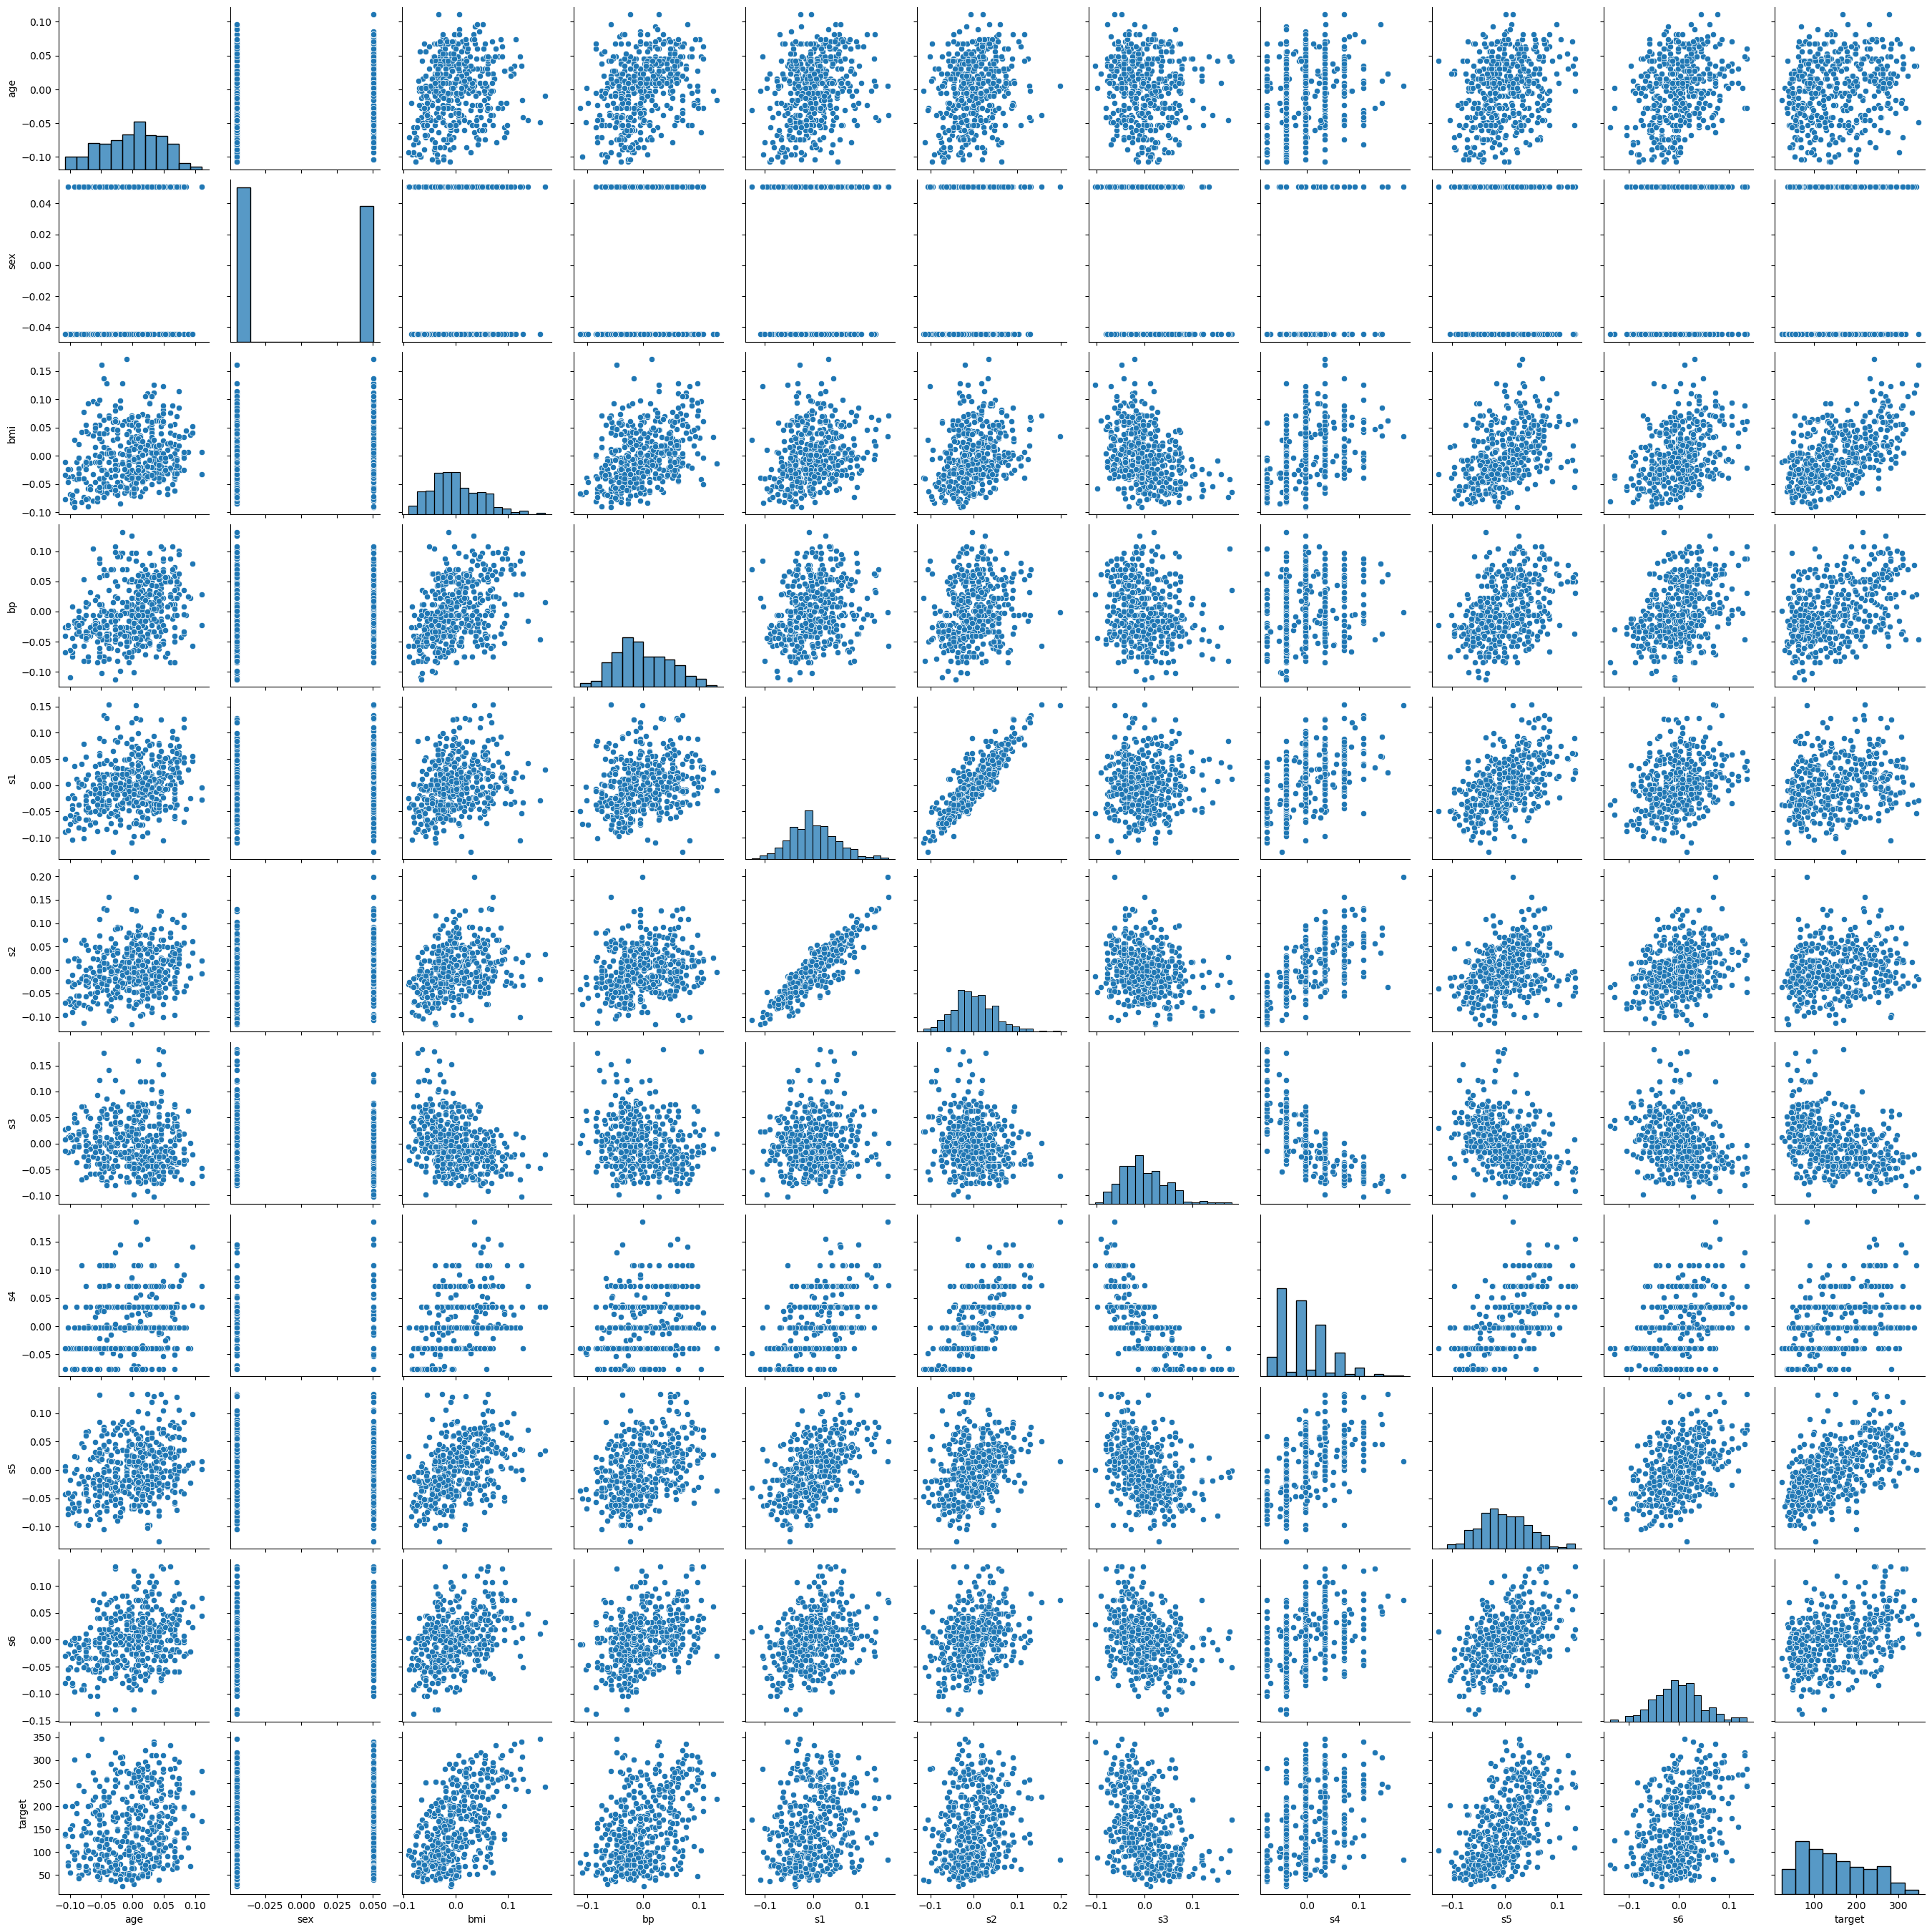

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


**Most features are normally distributed. All data are normalized including sex. Confirmed no categorical data.**

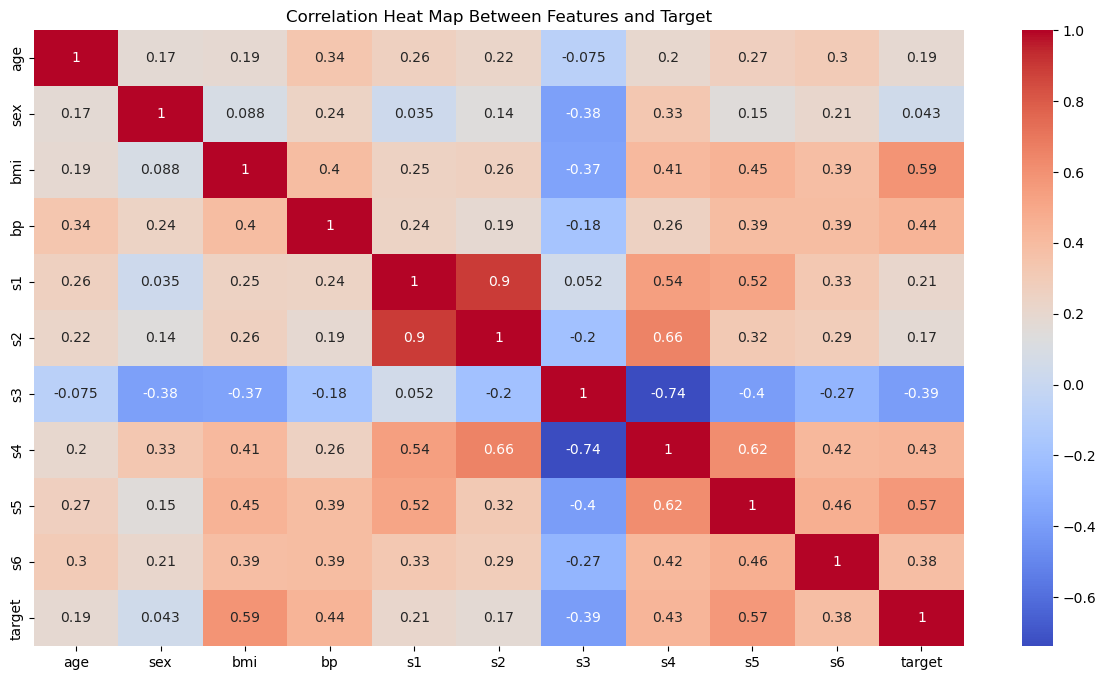

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map Between Features and Target')
plt.show()

**Other than sex, all other measurement are slightly correlated with `bmi` and `s5` over 50%. `s1` and `s2` are highly correlated, we can choose to drop one of them. Will drop `s2`.** 

## Data Processing & Preprocessing Pipeline

In [15]:
random_state = 0

In [16]:
X.shape

(442, 10)

In [17]:
X = X.drop(columns=['s2'])

In [18]:
X_train, X_test_temp, y_train, y_test_temp = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test_temp, y_test_temp, test_size=0.5, random_state=random_state)

In [19]:
numeric_cols = X.select_dtypes(include='number').columns
numeric_cols

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')

In [20]:
# ----------------------------
# Transformers
# ----------------------------
degree = 2

numeric_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler())
])

In [21]:
# ----------------------------
# ColumnTransformer
# ----------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_cols),
])

In [22]:
# ----------------------------
# Linear Regression Pipeline
# ----------------------------
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# ----------------------------
# Ridge Regression Pipeline
# ----------------------------
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])


# ----------------------------
# Lasso Regression Pipeline
# ----------------------------
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(max_iter=10000))
])


### Base Model Training

In [23]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object'))])),
                ('model', LinearRegression())])

In [24]:
## Linear Regression
# Compute metrics - Test Error
lr_mae = mean_absolute_error(y_val, lr_pipeline.predict(X_val))
lr_mse = mean_squared_error(y_val, lr_pipeline.predict(X_val))
lr_rmse = root_mean_squared_error(y_val, lr_pipeline.predict(X_val))
lr_r2 = r2_score(y_val, lr_pipeline.predict(X_val))

print("Linear Regression Metrics")
print("Mean Absolute Error:", lr_mae)
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("R^2 Score:", lr_r2)

Linear Regression Metrics
Mean Absolute Error: 58.54124836335636
Mean Squared Error: 5470.079490423614
Root Mean Squared Error: 73.95998573839515
R^2 Score: 0.02076093524906697


In [25]:
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object'))])),
                ('model', Ridge())])

In [26]:
## Ridge Regression
# Compute metrics - Test Error
ridge_mae = mean_absolute_error(y_val, ridge_pipeline.predict(X_val))
ridge_mse = mean_squared_error(y_val, ridge_pipeline.predict(X_val))
ridge_rmse = root_mean_squared_error(y_val, ridge_pipeline.predict(X_val))
ridge_r2 = r2_score(y_val, ridge_pipeline.predict(X_val))

print("Ridge Regression Metrics")
print("Mean Absolute Error:", ridge_mae)
print("Mean Squared Error:", ridge_mse)
print("Root Mean Squared Error:", ridge_rmse)
print("R^2 Score:", ridge_r2)

Ridge Regression Metrics
Mean Absolute Error: 58.712710777616515
Mean Squared Error: 5436.215738112948
Root Mean Squared Error: 73.7306973933717
R^2 Score: 0.02682313401596015


In [27]:
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object'))])),
                ('model', Lasso(max_iter=10000))])

In [28]:
## Lasso Regression
# Compute metrics - Test Error
lasso_mae = mean_absolute_error(y_val, lasso_pipeline.predict(X_val))
lasso_mse = mean_squared_error(y_val, lasso_pipeline.predict(X_val))
lasso_rmse = root_mean_squared_error(y_val, lasso_pipeline.predict(X_val))
lasso_r2 = r2_score(y_val, lasso_pipeline.predict(X_val))

print("Lasso Regression Metrics")
print("Mean Absolute Error:", lasso_mae)
print("Mean Squared Error:", lasso_mse)
print("Root Mean Squared Error:", lasso_rmse)
print("R^2 Score:", lasso_r2)

Lasso Regression Metrics
Mean Absolute Error: 56.263148077829584
Mean Squared Error: 4957.43905746431
Root Mean Squared Error: 70.40908362892043
R^2 Score: 0.11253246050814625


#### Baseline Model Analysis

In [29]:
print("Mean Square Error Comparison")
print("Linear Regression Mean Squared Error:", lr_mse)
print("Ridge Regression Mean Squared Error:", ridge_mse)
print("Lasso Regression Mean Squared Error:", lasso_mse)

Mean Square Error Comparison
Linear Regression Mean Squared Error: 5470.079490423614
Ridge Regression Mean Squared Error: 5436.215738112948
Lasso Regression Mean Squared Error: 4957.43905746431


**Lasso Regression has the least MSE. Linear Regression MSE of 5470 will be the baseline.**

### Grid Search

#### Linear Regression

In [30]:
# Linear regression parameter search grid
lr_param_grid = {
    'preprocessor__num__poly__degree': [2, 3], 
    'model__fit_intercept': [True, False]
}

In [31]:
# Run grid search - may take a while
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object'))])),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'model__fit_intercept': [True, False],
                         'preprocessor__num__poly__degree': [2, 3]},
             scoring='neg_mean_squared_error')

In [32]:
lr_grid_search.best_params_

{'model__fit_intercept': True, 'preprocessor__num__poly__degree': 2}

In [33]:
## Linear Regression
# Compute metrics - Test Error
lr_mae = mean_absolute_error(y_val, lr_grid_search.predict(X_val))
lr_mse = mean_squared_error(y_val, lr_grid_search.predict(X_val))
lr_rmse = root_mean_squared_error(y_val, lr_grid_search.predict(X_val))
lr_r2 = r2_score(y_val, lr_grid_search.predict(X_val))

print("Linear Regression Metrics")
print("Mean Absolute Error:", lr_mae)
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("R^2 Score:", lr_r2)

Linear Regression Metrics
Mean Absolute Error: 58.54124836335636
Mean Squared Error: 5470.079490423614
Root Mean Squared Error: 73.95998573839515
R^2 Score: 0.02076093524906697


#### Ridge Regression

In [34]:
# Ridge regression parameter search grid
ridge_param_grid = {
    'preprocessor__num__poly__degree': [2, 3], 
    'model__alpha': [65, 70, 75, 80, 85]
}

In [35]:
# Run grid search - may take a while
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object'))])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [65, 70, 75, 80, 85],
                         'preprocessor__num__poly__degree': [2, 3]},
             scoring='neg_mean_squared_error')

In [36]:
ridge_grid_search.best_params_

{'model__alpha': 75, 'preprocessor__num__poly__degree': 2}

In [37]:
## Ridge Regression
# Compute metrics - Test Error
ridge_mae = mean_absolute_error(y_val, ridge_grid_search.predict(X_val))
ridge_mse = mean_squared_error(y_val, ridge_grid_search.predict(X_val))
ridge_rmse = root_mean_squared_error(y_val, ridge_grid_search.predict(X_val))
ridge_r2 = r2_score(y_val, ridge_grid_search.predict(X_val))

print("Ridge Regression Metrics")
print("Mean Absolute Error:", ridge_mae)
print("Mean Squared Error:", ridge_mse)
print("Root Mean Squared Error:", ridge_rmse)
print("R^2 Score:", ridge_r2)

Ridge Regression Metrics
Mean Absolute Error: 55.615164451893
Mean Squared Error: 4840.081673477899
Root Mean Squared Error: 69.5706955080794
R^2 Score: 0.13354146689236046


#### Lasso Regression

In [38]:
# Lasso regression parameter search grid
lasso_param_grid = {
    'preprocessor__num__poly__degree': [2, 3], 
    'model__alpha': [1, 2, 3]
}

In [39]:
# Run grid search - may take a while
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object'))])),
                                       ('model', Lasso(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'model__alpha': [1, 2, 3],
                         'preprocessor__num__poly__degree': [2, 3]},
             scoring='neg_mean_squared_error')

In [40]:
lasso_grid_search.best_params_

{'model__alpha': 2, 'preprocessor__num__poly__degree': 2}

In [41]:
## Lasso Regression
# Compute metrics - Test Error
lasso_mae = mean_absolute_error(y_val, lasso_grid_search.predict(X_val))
lasso_mse = mean_squared_error(y_val, lasso_grid_search.predict(X_val))
lasso_rmse = root_mean_squared_error(y_val, lasso_grid_search.predict(X_val))
lasso_r2 = r2_score(y_val, lasso_grid_search.predict(X_val))

print("Lasso Regression Metrics")
print("Mean Absolute Error:", lasso_mae)
print("Mean Squared Error:", lasso_mse)
print("Root Mean Squared Error:", lasso_rmse)
print("R^2 Score:", lasso_r2)

Lasso Regression Metrics
Mean Absolute Error: 55.14045584404905
Mean Squared Error: 4789.462699221536
Root Mean Squared Error: 69.20594410324547
R^2 Score: 0.14260314087648274


#### Validation Dataset Performance Comparison

In [42]:
print("Mean Square Error Comparison on Validation dataset")
print("Linear Regression Mean Squared Error:", lr_mse)
print("Ridge Regression Mean Squared Error:", ridge_mse)
print("Lasso Regression Mean Squared Error:", lasso_mse)

Mean Square Error Comparison on Validation dataset
Linear Regression Mean Squared Error: 5470.079490423614
Ridge Regression Mean Squared Error: 4840.081673477899
Lasso Regression Mean Squared Error: 4789.462699221536


**After Grid Search the lowest MSE is Lasso Regression. Therefore, we recommend Lasso Regression.** 

### Final Application of Lasso Regression to Test Dataset

In [43]:
best_model = lasso_grid_search.best_estimator_
print('Best parameters', lasso_grid_search.best_params_)

Best parameters {'model__alpha': 2, 'preprocessor__num__poly__degree': 2}


In [44]:
## Best Model Application
# Compute metrics - Test Error
best_mae = mean_absolute_error(y_test, best_model.predict(X_test))
best_mse = mean_squared_error(y_test, best_model.predict(X_test))
best_rmse = root_mean_squared_error(y_test, best_model.predict(X_test))
best_r2 = r2_score(y_test, best_model.predict(X_test))

print("Best Model Regression Metrics")
print("Mean Absolute Error:", best_mae)
print("Mean Squared Error:", best_mse)
print("Root Mean Squared Error:", best_rmse)
print("R^2 Score:", best_r2)

Best Model Regression Metrics
Mean Absolute Error: 34.66830445115827
Mean Squared Error: 1912.9239519195185
Root Mean Squared Error: 43.736986086372234
R^2 Score: 0.48282330859418987


**After application of Lasso Regression on the test dataset, the mean square error is 1912.92.**

## End